The following cell combines all the code required to make a topographic and bathymetric map of Australia, and save it as a PNG file.

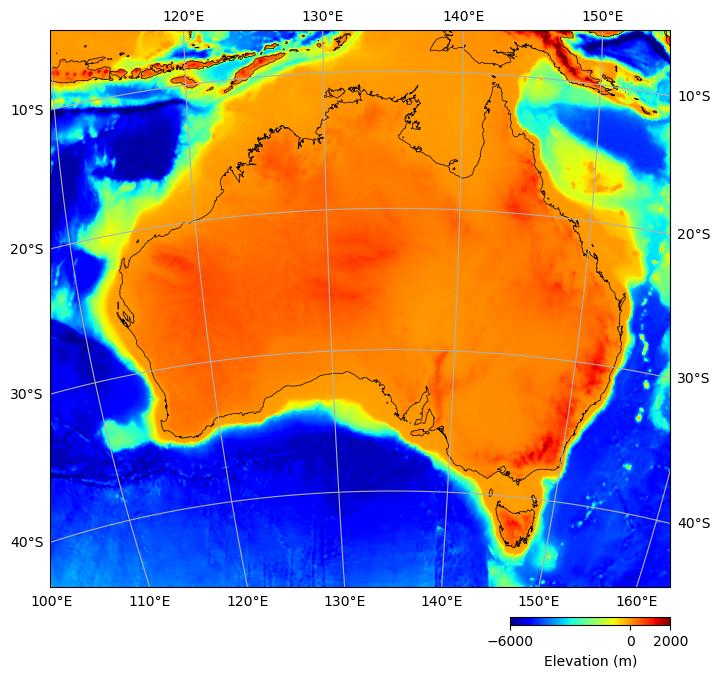

In [1]:
# Load all the required modules
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from osgeo import gdal
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# Read in the GEBCO data and define the extent
demFile = "global_gebco.tif"
ds = gdal.Open(demFile)
demArray = ds.ReadAsArray()
gt = ds.GetGeoTransform()
extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

# Read in the coastline shapefile
shapefile = "world-coastline.shp"
shape_feature = ShapelyFeature(Reader(shapefile).geometries(), ccrs.PlateCarree(),
                               facecolor='none', edgecolor='black', linewidth=0.5)

# Create a map of Australia
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=135, central_latitude=-30))
ax.set_extent([110, 155, -5, -45], crs=ccrs.PlateCarree())
im = ax.imshow(demArray, cmap='jet', origin='upper', extent=extent, transform=ccrs.PlateCarree(), vmin=-6000, vmax=2000)
ax.add_feature(shape_feature)
ax.gridlines(draw_labels=True)
cbaxes = fig.add_axes([0.7, 0.1, 0.2, 0.01])
cbar = plt.colorbar(im, orientation='horizontal', cax=cbaxes, ticks=[-6000, 0, 2000])
cbar.set_label('Elevation (m)')
plt.savefig("australia_topo_bathy.png", dpi=300)
plt.show()